K-Fold Cross Validation Using Support Vector Machine (SVM)

Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing Data Set

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
df
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(x,y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

splitting The Data Set Into training and testing Sets


In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)
print(x_train,x_test,y_train,y_test)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

Features Scalling

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_test=sc.fit_transform(x_test)
x_train=sc.transform(x_train)
print(x_train,x_test)

[[ 0.68085265 -0.95459652]
 [-0.37201227  1.52209528]
 [ 0.15442019 -0.61825566]
 [-0.37201227  1.98074191]
 [ 1.3827626  -1.50497248]
 [ 1.47050135  1.03287221]
 [ 0.24215893 -0.86286719]
 [ 0.15442019 -0.2819148 ]
 [-0.0210573  -0.61825566]
 [-0.0210573  -0.22076191]
 [-0.10879604 -1.38266671]
 [-0.10879604 -0.61825566]
 [ 0.50537516  0.08500251]
 [ 0.94406888 -0.6488321 ]
 [ 1.99693381 -1.26036094]
 [ 1.11954637 -0.15960903]
 [ 0.7685914   1.85843615]
 [-0.45975102  0.57422558]
 [ 0.85633014  0.36019049]
 [ 0.94406888 -0.58767922]
 [-0.89844474 -1.68843113]
 [ 2.08467255  0.97171933]
 [ 0.15442019  1.27748375]
 [ 0.32989768  1.12460154]
 [ 0.50537516 -0.52652633]
 [-0.10879604 -0.34306768]
 [ 1.03180763 -0.89344364]
 [ 1.03180763  1.95016547]
 [ 0.15442019  1.30806019]
 [-0.63522851  2.37823566]
 [-0.89844474 -1.68843113]
 [ 2.08467255 -0.86286719]
 [-1.07392223 -1.56612536]
 [ 0.50537516  2.4088121 ]
 [ 0.85633014  0.78826068]
 [-0.72296725 -0.34306768]
 [ 0.24215893  0.78826068]
 

Traninig the SVM model on the training set

In [5]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf",random_state=0)
classifier.fit(x_train,y_train)

SVC(random_state=0)

Prediction of X_test with the model

In [6]:
y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


Making The confusion matrix

[[64  4]
 [ 3 29]]


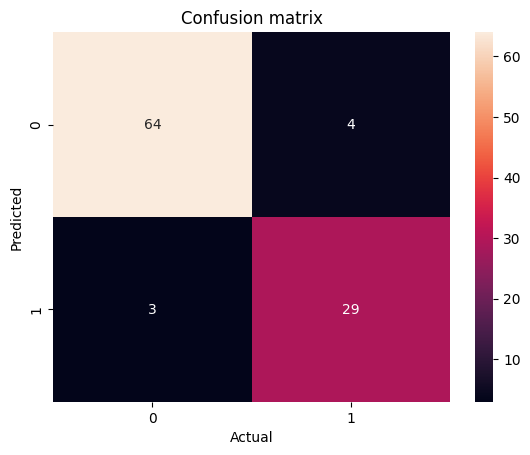

<Figure size 640x480 with 0 Axes>

In [7]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns
cm= confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True,fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion matrix")
plt.show()
plt.savefig("ConfusionMatrix.png")

Accuracy Score

In [8]:
accuracy_score(y_test,y_pred)

0.93

Classification Report

In [9]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



Applying K fold Cross Validation

In [10]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10)
print("accuracies:", accuracies.mean())
print("Standard deviation: ",accuracies.std())

accuracies: 0.9
Standard deviation:  0.0683130051063973


Visualizing The Traning set 

C:\Users\91995\AppData\Local\Temp\ipykernel_40780\2589090114.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


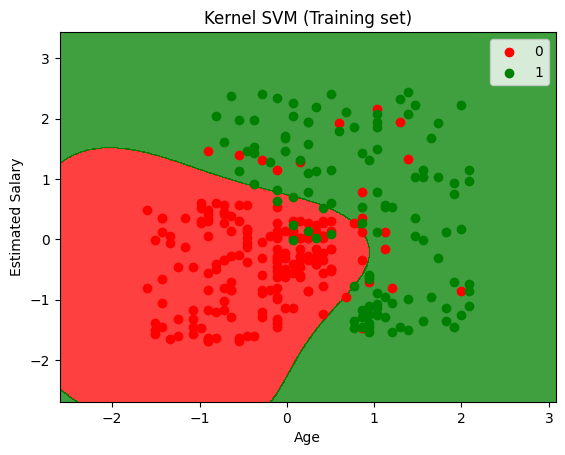

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.savefig("Training Set.png")
plt.show()

Visualizing The Test Set

C:\Users\91995\AppData\Local\Temp\ipykernel_40780\1937643601.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


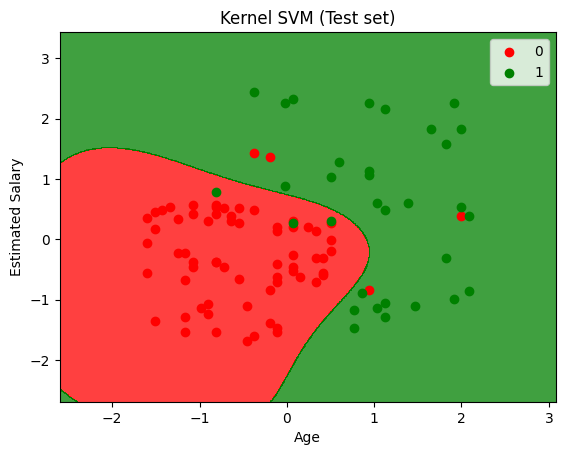

In [14]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.savefig("Testingset.png")
plt.show()